In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.ndimage as ndi

In [3]:
from skimage.transform import radon, iradon

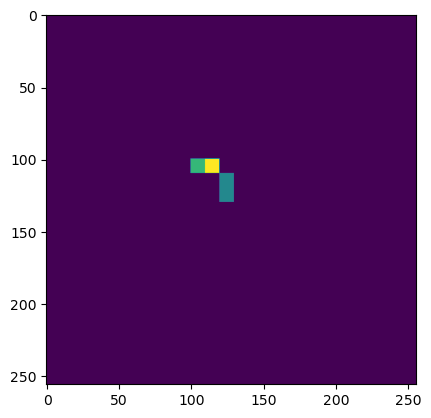

In [7]:
orImm = np.zeros((256,256))
orImm[100:110,100:110]=1
orImm[100:110,110:120]=1.5
orImm[110:130,120:130]=0.7
plt.imshow(orImm)

In [9]:
sino = radon(orImm,np.arange(180))

In [12]:
help (iradon)

Help on function iradon in module skimage.transform.radon_transform:

iradon(radon_image, theta=None, output_size=None, filter_name='ramp', interpolation='linear', circle=True, preserve_range=True)
    Inverse radon transform.
    
    Reconstruct an image from the radon transform, using the filtered
    back projection algorithm.
    
    Parameters
    ----------
    radon_image : ndarray
        Image containing radon transform (sinogram). Each column of
        the image corresponds to a projection along a different
        angle. The tomography rotation axis should lie at the pixel
        index ``radon_image.shape[0] // 2`` along the 0th dimension of
        ``radon_image``.
    theta : array, optional
        Reconstruction angles (in degrees). Default: m angles evenly spaced
        between 0 and 180 (if the shape of `radon_image` is (N, M)).
    output_size : int, optional
        Number of rows and columns in the reconstruction.
    filter_name : str, optional
        Filter 

In [30]:
def makeFFT_2D_filter (imShape_):
    d_ = .65
    order = np.power(2,np.ceil(np.log2(imShape_[1]))).astype(np.uint32)
   # freqN = np.power(2,np.ceil(np.log2(imShape_[1]//2))).astype(np.uint32)
    print (order)
    freqN = order//2
 #   imShape_ = inpImage.shape
    nFreq = np.arange(0,freqN +1)
    filtImpResp = np.zeros((len(nFreq),))
    filtImpResp[0]=1/4
    filtImpResp[1::2]=-1/((np.pi*nFreq[1::2])**2)
    filtImpResp = np.concatenate([filtImpResp,filtImpResp[-2:0:-1]])
    ftFilt = 2 * np.real(np.fft.fft(filtImpResp)) # check! when implemented correctly the imag part is zero within numerical precision
    ftFilt = ftFilt[:(freqN+1)]
    
    #fMax = freqN
    fV = 2*np.pi*(np.arange(1,freqN+1))/imShape_[1]
    ftFilt[1:] *= (np.sin(fV/(2*d_)) / (fV/(2*d_)))
    ftFilt[ftFilt<0]=0
    
    xf = np.arange(0,imShape_[1]//2+1).reshape((1,imShape_[1]//2+1))
    yf = xf.transpose()
    freqR = np.sqrt(xf**2+yf**2)
    interpF = np.interp(freqR,nFreq,ftFilt,right=0)
    interpF = np.concatenate([interpF,interpF[-2:0:-1,:]],axis=0)
    interpF = np.concatenate([interpF,interpF[:,-2:0:-1]],axis=1)
#    interpF = interpF.reshape(imShape_[1:])
    return interpF
    
    #invFFilt = np.fft.ifft(np.real(ftFilt)) 

#filtImpResp = 


In [31]:
filt = makeFFT_2D_filter((256,256))

256


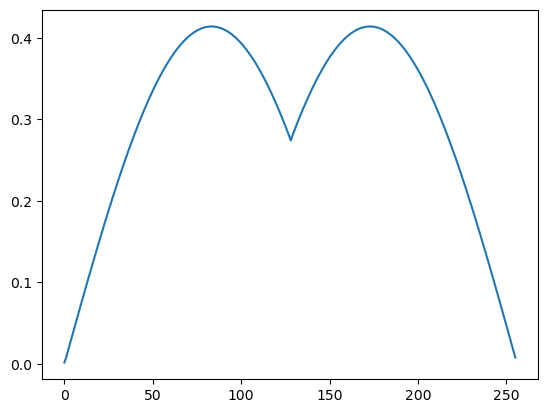

In [32]:
plt.plot(filt[:,0])

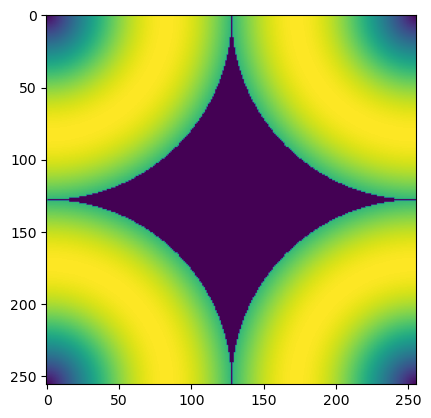

In [33]:
plt.imshow(filt)

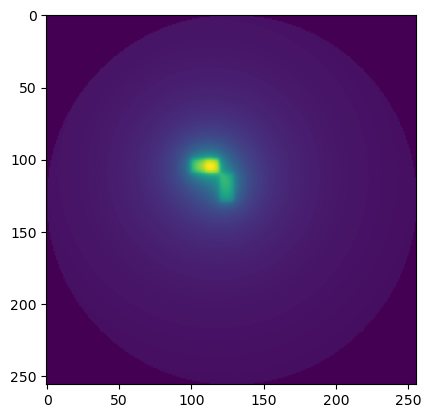

In [34]:
immBP = iradon(sino,np.arange(180),filter_name=None)
plt.imshow(immBP)

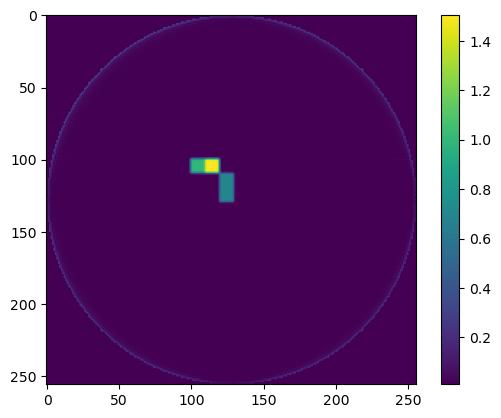

In [37]:
immBPf = np.real(np.fft.ifft2(np.fft.fft2(immBP)*filt))
plt.imshow(immBPf,vmin=.01)
# plt.xlim(50,150)
# plt.ylim(50,150)
plt.colorbar()